## Explore the bias data in the FACTors dataset

The creators of the FACTors dataset, analysed all content with politicalBiasBERT. From this analyses it becomes clear that politicalBiasBERT, does not work that well on the fact-check articles, since authors that seem to be biased often score high on left and right.

First 12 articles that contain multiple claims are removed from the FACTors dataset.

In [7]:
import pandas as pd

# Load the data
factors_df = pd.read_csv("Data/FACTors.csv")

# Identify article_ids that occur only once
article_counts = factors_df['article_id'].value_counts()
duplicate_article_ids = article_counts[article_counts > 1]
unique_article_ids = article_counts[article_counts == 1].index

# Filter the DataFrame to keep only unique article_ids
clean_factors_df = factors_df[factors_df['article_id'].isin(unique_article_ids)]

# Confirm removal
print(f"Original rows: {len(factors_df)}")
print(f"Articles with multiple claims: {len(duplicate_article_ids)}")
print(f"Rows after removing duplicates: {len(clean_factors_df)}")

Original rows: 118112
Articles with multiple claims: 12
Rows after removing duplicates: 117981


Next the data is joined with the content_bias_scores.csv, containing the biasscores as a list (left, center and right). These scores were substracted and added as separate variables.

In [8]:
import ast

# Join the dataframes clean_factors_df and bias_df
bias_df = pd.read_csv("Data/content_bias_scores.csv")
joined_df = pd.merge(bias_df[["article_id","bias_scores"]], clean_factors_df, on='article_id', how='inner')

# Convert the string of bias scores to a list 
joined_df["bias_scores"] = joined_df["bias_scores"].apply(ast.literal_eval)

#Extract the bias scores to separate columns
joined_df["left_bias"]=joined_df["bias_scores"].apply(lambda x: x[0])
joined_df["not_biased"]=joined_df["bias_scores"].apply(lambda x: x[1])
joined_df["right_bias"]=joined_df["bias_scores"].apply(lambda x: x[2])
joined_df.drop(columns=["bias_scores"], inplace=True)

Check the average Bias and number of articles written for each author.

In [5]:
author_bias_stats = joined_df.groupby(['author','organisation']).agg(
    left_bias_mean=('left_bias', 'mean'),
    not_biased_mean=('not_biased', 'mean'),
    right_bias_mean=('right_bias', 'mean'),
    article_count=('article_id', 'count')
).reset_index()

print(author_bias_stats.head())

                   author    organisation  left_bias_mean  not_biased_mean  \
0              'Juwon Ojo          Dubawa        0.008268         0.981461   
1  A. Kwabena Brakopowers          Dubawa        0.322538         0.439818   
2             A. Momar Lo    Africa Check        0.006335         0.965391   
3           Aaishah Janif  AFP Fact Check        0.193039         0.606510   
4          Aaron Bartilad      PressOnePH        0.111752         0.074598   

   right_bias_mean  article_count  
0         0.010271              1  
1         0.237644              1  
2         0.028274              1  
3         0.200450             12  
4         0.813650              5  


Filter on authors, who have publised at least 100 articles

In [80]:
author_bias_stats_filtered = author_bias_stats[author_bias_stats['article_count'] >= 100]
author_bias_stats_filtered.head()

,author,organisation,left_bias_mean,not_biased_mean,right_bias_mean,article_count
9,Aayushi Rana,DFRAC_ORG,0.113106,0.417092,0.469802,163
10,Abbas Panjwani,Full Fact,0.272904,0.557823,0.169273,411
27,Abhilash Mallick,WebQoof,0.278556,0.481163,0.240281,373
31,Abhishek Anand,WebQoof,0.270673,0.328863,0.400464,669
35,Abhishek Mandadi,FACTLY,0.258110,0.441887,0.300003,293


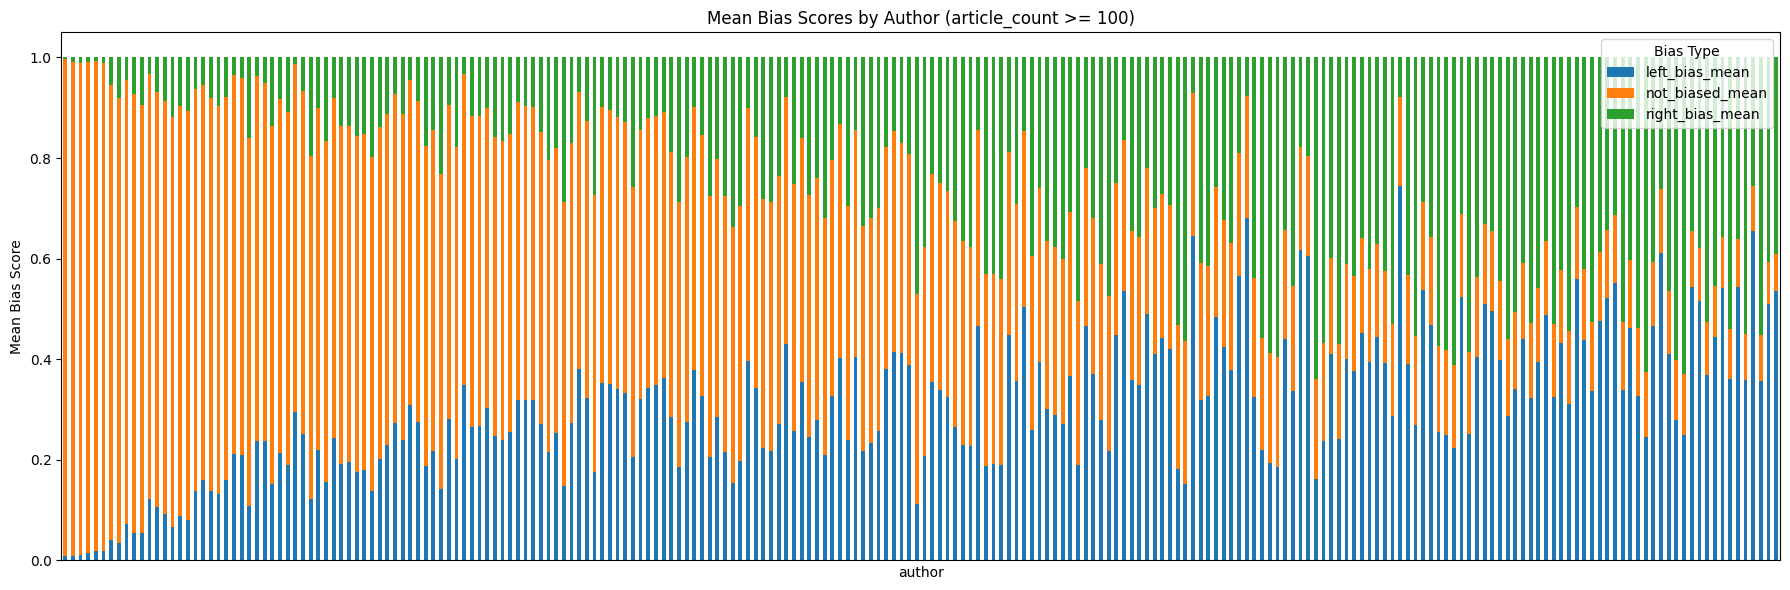

In [ ]:
import matplotlib.pyplot as plt

# Sort by not_biased_mean in descending order
author_bias_stats_filtered_sorted = author_bias_stats_filtered.sort_values(by='not_biased_mean', ascending=False)

# Plot left_bias_mean, not_biased_mean, and right_bias_mean for each author
author_bias_stats_filtered_sorted.plot(
    x='author',
    y=['left_bias_mean', 'not_biased_mean', 'right_bias_mean'],
    kind='bar',
    figsize=(18, 6),
    stacked=True
)
plt.ylabel('Mean Bias Score')
plt.title('Mean Bias Scores by Author (article_count >= 100)')
plt.xticks([], [])  # Hide x-axis labels for readability
plt.legend(title='Bias Type')
plt.tight_layout()
plt.show()

More to the left are authors that are generally not biased according to the analysis with politicalBiasBERT, however there are not that many authors who linger much more to the left then right. Many authors seem to be biased to the left and right. 

In [13]:
org_bias_stats = joined_df.groupby(['organisation']).agg(
    left_bias_mean=('left_bias', 'mean'),
    not_biased_mean=('not_biased', 'mean'),
    right_bias_mean=('right_bias', 'mean'),
    article_count=('article_id', 'count')
).reset_index()

print(org_bias_stats.head())

                  organisation  left_bias_mean  not_biased_mean  \
0               AFP Fact Check        0.214468         0.612745   
1                      AP News        0.133130         0.784926   
2                 Africa Check        0.296222         0.585460   
3  Australian Associated Press        0.142670         0.778616   
4                         BOOM        0.362736         0.401228   

   right_bias_mean  article_count  
0         0.172787          11799  
1         0.081944            182  
2         0.118318           6316  
3         0.078715           1474  
4         0.236035           2780  


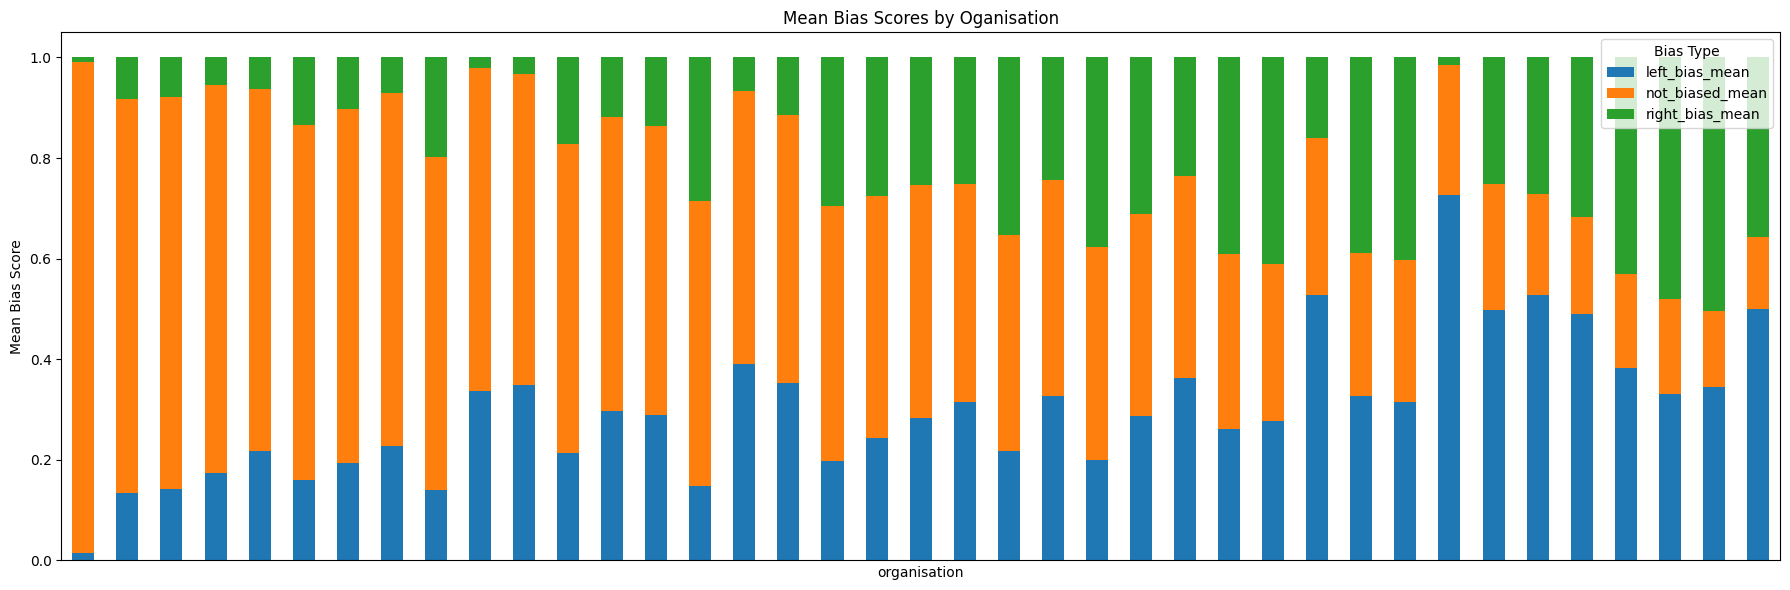

In [19]:
import matplotlib.pyplot as plt

# Sort by not_biased_mean in descending order
org_bias_stats_sorted = org_bias_stats.sort_values(by='not_biased_mean', ascending=False)

# Plot left_bias_mean, not_biased_mean, and right_bias_mean for each author
org_bias_stats_sorted.plot(
    x='organisation',
    y=['left_bias_mean', 'not_biased_mean', 'right_bias_mean'],
    kind='bar',
    figsize=(18, 6),
    stacked=True
)
plt.ylabel('Mean Bias Score')
plt.title('Mean Bias Scores by Oganisation')
plt.xticks([], [])  
plt.legend(title='Bias Type')
plt.tight_layout()
plt.show()